我这边是每一次run必须使用下面这一块，否则显示level0错误

In [170]:
import importlib
import BetweenCountry
import DataProcess
importlib.reload(BetweenCountry)
importlib.reload(DataProcess)

<module 'DataProcess' from 'E:\\Xiaotong\\UIUC\\FA24\\IS597\\HW\\Project\\2024Fall_projects_Olympic_Effect\\DataProcess.py'>

In [104]:
import pandas as pd

In [171]:
from DataProcess import preprocess_csv_type1
from DataProcess import preprocess_csv_type2
from DataProcess import preprocess_csv_type3
from DataProcess import preprocess_special_csv

In [172]:
from BetweenCountry import index_rename_and_calculate_growth_rate, growth_rate_plot, two_subplots, two_plot_health
from BetweenCountry import highlight_key_correlations_all_matrices

In [ ]:
from BetweenCountry import load_and_merge_data
from BetweenCountry import metric_groups, country_suffix
from BetweenCountry import calculate_correlation, compute_country_correlation_matrices
from BetweenCountry import predefined_combinations, plot_predefined_combinations_bar
from BetweenCountry import plot_all_heatmaps
from BetweenCountry import predefined_correlation_analysis

## Economic Indicator

* GDP

In [16]:
AUS_GDP = preprocess_csv_type1(
    file_path='data/australia-gdp-gross-domestic-product.csv',
    date_column='Date',
    year_column='Date',
    year_range=(1995, 2005),
    skip_rows=7
)

CHI_GDP = preprocess_csv_type1(
    file_path='data/china-gdp-gross-domestic-product.csv',
    date_column='Date',
    year_column='Date',
    year_range=(2003, 2013),
    skip_rows=7
)


print(AUS_GDP.head())
print(CHI_GDP.head())

    Date  GDP (Billions of US $)  Per Capita (US $)  Annual % Change
35  1995              368.166023         20448.1220           3.8832
36  1996              401.341881         22021.7839           3.8639
37  1997              435.642611         23646.6230           3.9132
38  1998              399.674422         21479.1142           4.6633
39  1999              389.652212         20712.6698           5.0276
    Date  GDP (Billions of US $)  Per Capita (US $)  Annual % Change
43  2003             1660.280544          1288.6375          10.0380
44  2004             1955.346769          1508.6679          10.1136
45  2005             2285.961150          1753.4142          11.3946
46  2006             2752.118657          2099.2194          12.7210
47  2007             3550.327803          2693.9587          14.2309


In [17]:
# Set index to continuous int
# Find out the 2 csv have different names for 'Date' column & 'GDP' column, rename it.
# Sometimes the strip doesn't work in DataProcess, need to check
# Calculate growth rate per year
cleaned_df1_gdp = index_rename_and_calculate_growth_rate(
    df=AUS_GDP,
    rename_dict=
        {'Date': 'Year', 'Per Capita (US $)': 'GDP_per_capita'},
    host_year=2000,
    metric_column='GDP_per_capita')

cleaned_df2_gdp = index_rename_and_calculate_growth_rate(
    df=CHI_GDP,
    rename_dict=
        {'Date': 'Year', 'Per Capita (US $)': 'GDP_per_capita'},
    host_year=2008,
    metric_column='GDP_per_capita')

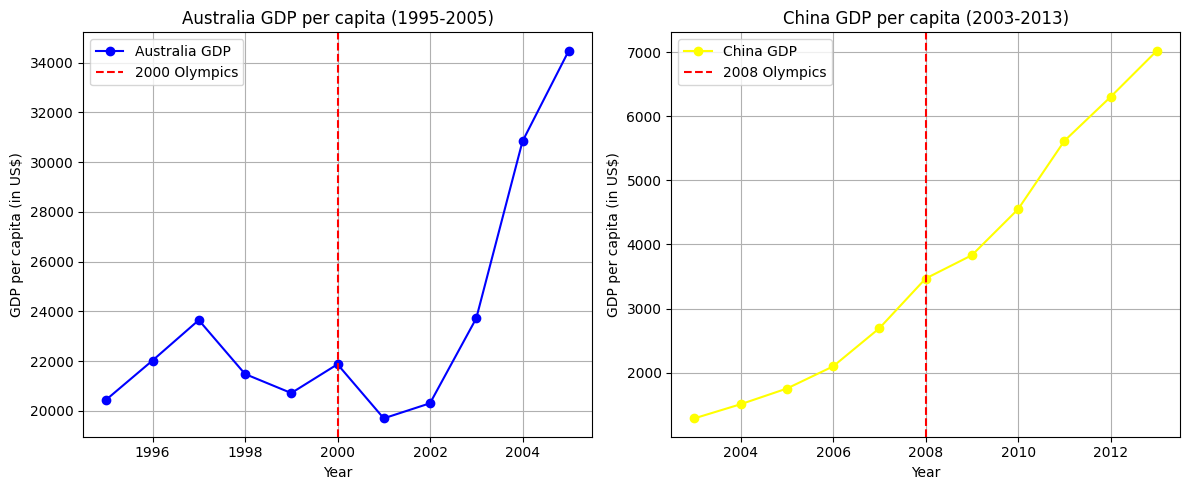

In [18]:
two_subplots(
    df1=cleaned_df1_gdp,
    host_year1=2000,
    legend1="Australia GDP",
    title1="Australia GDP per capita (1995-2005)",
    df2=cleaned_df2_gdp,
    host_year2=2008,
    legend2="China GDP",
    title2="China GDP per capita (2003-2013)",
    x_column='Year',
    y_column='GDP_per_capita',
    xlabel="Year",
    ylabel="GDP per capita (in US$)"
)

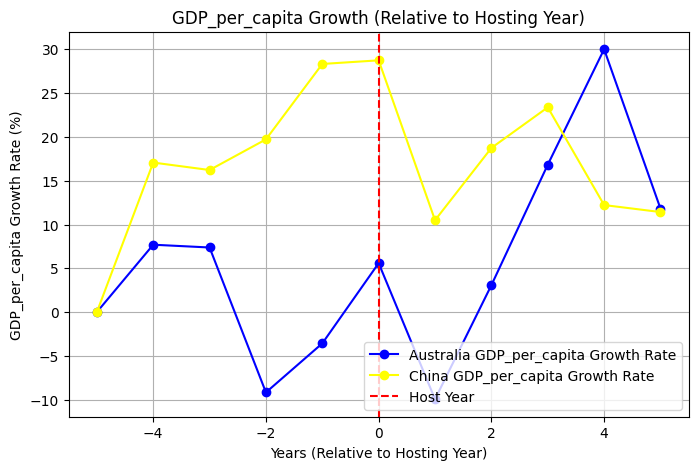

In [19]:
growth_rate_plot(
    dfs=[cleaned_df1_gdp,cleaned_df2_gdp], 
    countries=['Australia', 'China'], 
    metric='GDP_per_capita',
    colors=None
)

* Foreign Direct Investment

In [21]:
AUS_FDI = preprocess_csv_type3(
        file_path='data/Foreign_Direct _Investment.csv',
        country_column='Country Name',
        countries=['Australia'],
        year_column='Year',
        year_range=(1995,2005),
        skip_rows=3,
        value_column='Value',
        convert_to_billion=True,
        column_label='FDI'
    )


CHI_FDI = preprocess_csv_type3(
        file_path='data/Foreign_Direct _Investment.csv',
        country_column='Country Name',
        countries=['China'],
        year_column='Year',
        year_range=(2003,2013),
        skip_rows=3,
        value_column='Value',
        convert_to_billion=True,
        column_label='FDI'
    )

print(AUS_FDI.head())  # test success
print(CHI_FDI.head())  # test success

   Country Name  Year        FDI
35    Australia  1995  13.268875
36    Australia  1996   4.563952
37    Australia  1997   8.088069
38    Australia  1998   7.597611
39    Australia  1999   2.210918
   Country Name  Year         FDI
43        China  2003   57.900937
44        China  2004   68.117272
45        China  2005  104.108694
46        China  2006  124.082036
47        China  2007  156.249335


In [22]:
cleaned_df1_FDI = index_rename_and_calculate_growth_rate(
    df=AUS_FDI,
    rename_dict=None,
    host_year=2000,
    metric_column='FDI')

cleaned_df2_FDI = index_rename_and_calculate_growth_rate(
    df=CHI_FDI,
    rename_dict=None,
    host_year=2008,
    metric_column='FDI')

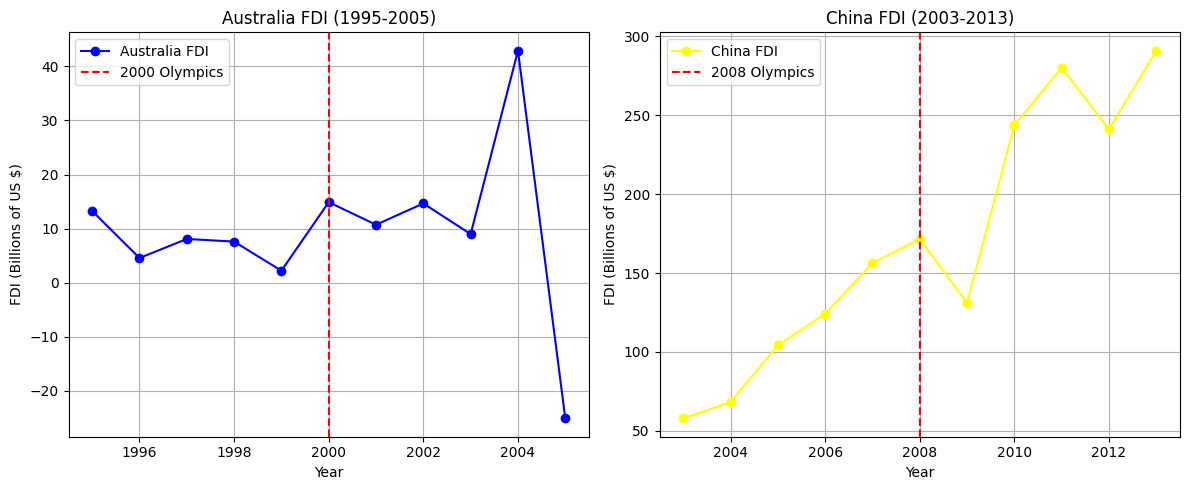

In [148]:
two_subplots(
    df1=cleaned_df1_FDI,
    host_year1=2000,
    legend1="Australia FDI",
    title1="Australia FDI (1995-2005)",
    df2=cleaned_df2_FDI,
    host_year2=2008,
    legend2="China FDI",
    title2="China FDI (2003-2013)",
    x_column='Year',
    y_column='FDI',
    xlabel="Year",
    ylabel="FDI (Billions of US $)",
)

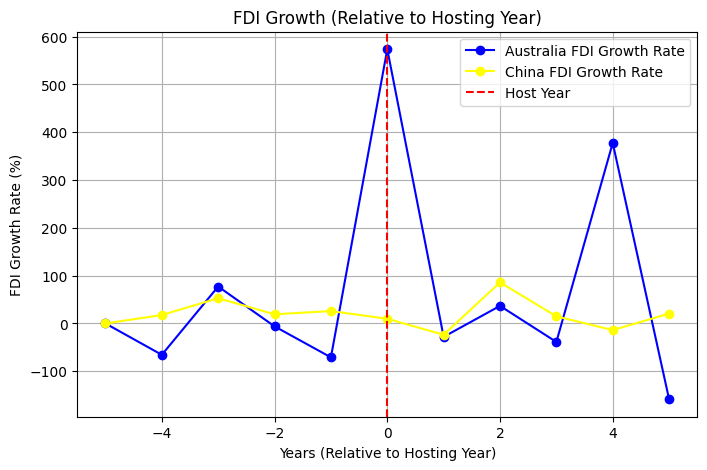

In [149]:
growth_rate_plot(
    dfs=[cleaned_df1_FDI,cleaned_df2_FDI], 
    countries=['Australia', 'China'], 
    metric='FDI',
    colors=None
)

* Gov. Consumption

In [23]:
AUS_gov_consume = preprocess_csv_type3(
        file_path='data/Government_consumption.csv',
        country_column='Country Name',
        countries=['Australia'],
        year_column='Year',
        year_range=(1995, 2005),
        skip_rows=3,
        value_column='Value',
        convert_to_billion=True,
        column_label='Gov_Consumption'
    )


CHI_gov_consume = preprocess_csv_type3(
        file_path='data/Government_consumption.csv',
        country_column='Country Name',
        countries=['China'],
        year_column='Year',
        year_range=(2003, 2013),
        skip_rows=3,
        value_column='Value',
        convert_to_billion=True,
        column_label='Gov_Consumption'
    )
print(AUS_gov_consume.head())  # test success
print(CHI_gov_consume.head())  # test success

   Country Name  Year  Gov_Consumption
35    Australia  1995        68.630829
36    Australia  1996        74.587956
37    Australia  1997        79.594491
38    Australia  1998        72.989894
39    Australia  1999        72.984710
   Country Name  Year  Gov_Consumption
43        China  2003       254.258838
44        China  2004       285.976158
45        China  2005       338.268817
46        China  2006       407.878185
47        China  2007       519.297995


In [24]:
cleaned_df1_gov_consume = index_rename_and_calculate_growth_rate(
    df=AUS_gov_consume,
    rename_dict=None,
    host_year=2000,
    metric_column='Gov_Consumption')

cleaned_df2_gov_consume = index_rename_and_calculate_growth_rate(
    df=CHI_gov_consume,
    rename_dict=None,
    host_year=2008,
    metric_column='Gov_Consumption')

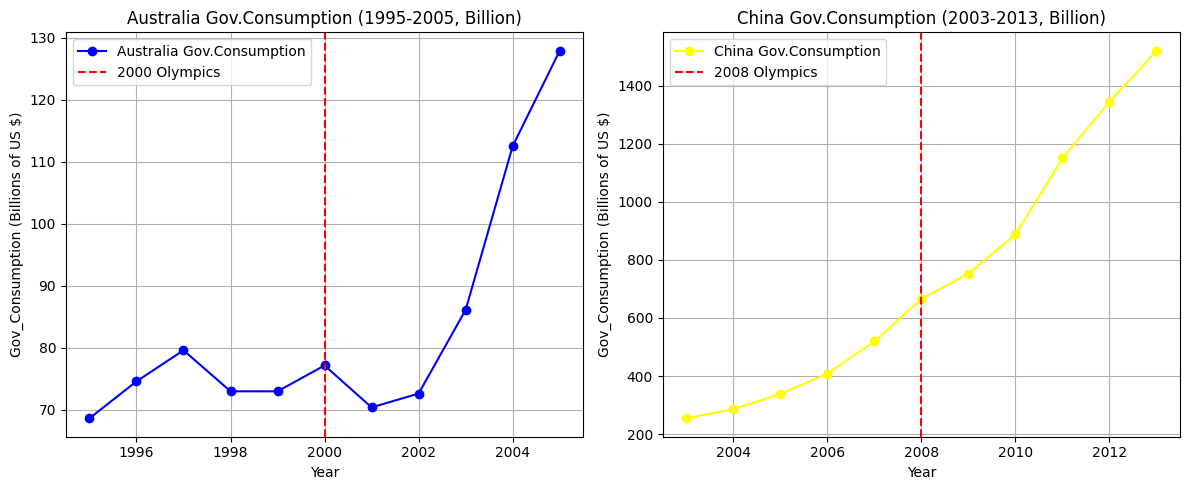

In [27]:
two_subplots(
    df1=cleaned_df1_gov_consume,
    host_year1=2000,
    legend1="Australia Gov.Consumption",
    title1="Australia Gov.Consumption (1995-2005, Billion)",
    df2=cleaned_df2_gov_consume,
    host_year2=2008,
    legend2="China Gov.Consumption",
    title2="China Gov.Consumption (2003-2013, Billion)",
    x_column='Year',
    y_column='Gov_Consumption',
    xlabel="Year",
    ylabel="Gov_Consumption (Billions of US $)",
)

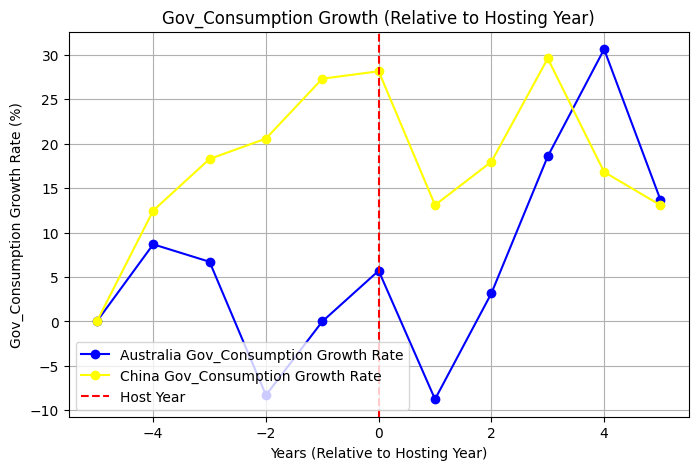

In [19]:
growth_rate_plot(
    dfs=[cleaned_df1_gov_consume,cleaned_df2_gov_consume], 
    countries=['Australia', 'China'], 
    metric='Gov_Consumption',
    colors=None
)

## Tourism Performance

In [25]:
AUS_tourism = preprocess_csv_type3(
        file_path='data/tourism_data.csv',
        country_column='Country Name',
        countries=['Australia'],
        year_column='Year',
        year_range=(1995, 2005),
        skip_rows=3,
        value_column='Value',
        convert_to_million=True,
        column_label='Tourism'
    )

CHI_tourism = preprocess_csv_type3(
        file_path='data/tourism_data.csv',
        country_column='Country Name',
        countries=['China'],
        year_column='Year',
        year_range=(2003, 2013),
        skip_rows=3,
        value_column='Value',
        convert_to_million=True,
        column_label='Tourism'
    )

print(AUS_tourism.head())  # test success
print(CHI_tourism.head())  # test success

   Country Name  Year  Tourism
35    Australia  1995    3.726
36    Australia  1996    4.165
37    Australia  1997    4.318
38    Australia  1998    4.167
39    Australia  1999    4.459
   Country Name  Year  Tourism
43        China  2003   91.662
44        China  2004  109.038
45        China  2005  120.292
46        China  2006  124.942
47        China  2007  131.873


In [26]:
cleaned_df1_tour = index_rename_and_calculate_growth_rate(
    df=AUS_tourism,
    rename_dict={'Tourism':'Num_Arrivals'},
    host_year=2000,
    metric_column='Num_Arrivals')

cleaned_df2_tour = index_rename_and_calculate_growth_rate(
    df=CHI_tourism,
    rename_dict={'Tourism':'Num_Arrivals'},
    host_year=2008,
    metric_column='Num_Arrivals')

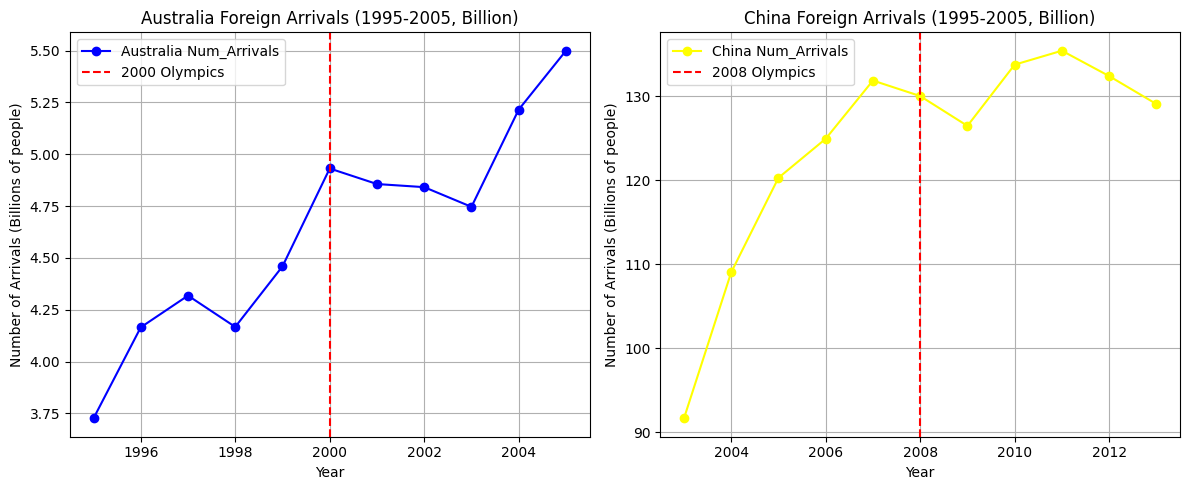

In [25]:
two_subplots(
    df1=cleaned_df1_tour,
    host_year1=2000,
    legend1="Australia Num_Arrivals",
    title1="Australia Foreign Arrivals (1995-2005, Billion)",
    df2=cleaned_df2_tour,
    host_year2=2008,
    legend2="China Num_Arrivals",
    title2="China Foreign Arrivals (1995-2005, Billion)",
    x_column='Year',
    y_column='Num_Arrivals',
    xlabel="Year",
    ylabel="Number of Arrivals (Billions of people)",
)

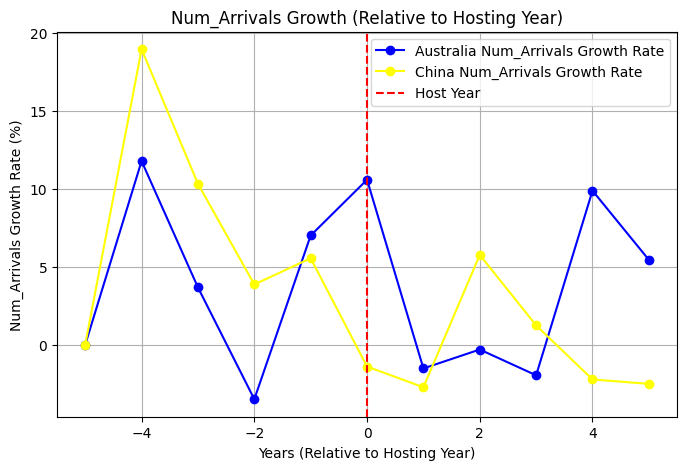

In [26]:
growth_rate_plot(
    dfs=[cleaned_df1_tour,cleaned_df2_tour], 
    countries=['Australia', 'China'], 
    metric='Num_Arrivals',
    colors=None
)

## Health Metrics

* Obesity

In [46]:
AUS_obesity = preprocess_csv_type2(
        file_path='data/Prevalence_of_obesity_among_adults.csv',
        country_column='Location',
        countries=['Australia'],
        year_column='Period',
        year_range=(1995, 2005),
        skip_rows=0
    )

CHI_obesity = preprocess_csv_type2(
        file_path='data/Prevalence_of_obesity_among_adults.csv',
        country_column='Location',
        countries=['China'],
        year_column='Period',
        year_range=(2003,2013),
        skip_rows=0
    )
print(AUS_obesity.head())  # test success
print(CHI_obesity.head())  # test success

      Location  Period        Dim1  Value
104  Australia    2005        Male   23.5
105  Australia    2005      Female   23.5
106  Australia    2005  Both sexes   23.5
110  Australia    2004        Male   22.8
111  Australia    2004  Both sexes   22.9
   Location  Period        Dim1  Value
57    China    2013        Male    4.6
58    China    2013  Both sexes    4.9
59    China    2013      Female    5.1
63    China    2012        Male    4.3
64    China    2012  Both sexes    4.6


In [49]:
def process_heath_data(df, host_year, metric_name):
    """
    Process obesity data for each gender and calculate growth rates.
    
    :param df: DataFrame to process
    :param host_year: Year used as the reference for calculating growth rates
    :param metric_name: Metric name to calculate growth rates
    :return: Combined DataFrame with growth rates for all genders
    """
    gender_list = ['Female', 'Male', 'Both sexes']  # List of genders to process
    processed_data = []
    
    for gender in gender_list:
        processed_df = index_rename_and_calculate_growth_rate(
            df=df[df['Dim1'] == gender].copy(),
            rename_dict={'Location': 'Country', 'Period': 'Year', 'Dim1': 'Gender', 'Value': f'{metric_name}_rate'},
            host_year=host_year,
            metric_column=f'{metric_name}_rate'
        )
        processed_data.append(processed_df) 
    return pd.concat(processed_data, ignore_index=True)


In [50]:
cleaned_df1_obe = process_heath_data(AUS_obesity, host_year=2000, metric_name='Obesity')
cleaned_df2_obe = process_heath_data(CHI_obesity, host_year=2008, metric_name='Obesity')

print("Australia Data:")
print(cleaned_df1_obe.head())
print("\nChina Data:")
print(cleaned_df2_obe.head())

Australia Data:
   index    Country  Year  Gender  Obesity_rate  Growth Rate (%)  \
0    166  Australia  1995  Female          16.8         0.000000   
1    160  Australia  1996  Female          17.5        -2.127660   
2    154  Australia  1997  Female          18.3        -2.608696   
3    148  Australia  1998  Female          19.0        -2.678571   
4    141  Australia  1999  Female          19.8        -3.211009   

   Relative Year  
0             -5  
1             -4  
2             -3  
3             -2  
4             -1  

China Data:
   index Country  Year  Gender  Obesity_rate  Growth Rate (%)  Relative Year
0    119   China  2003  Female           3.0         0.000000             -5
1    113   China  2004  Female           3.2        -3.921569             -4
2    107   China  2005  Female           3.3        -6.122449             -3
3    101   China  2006  Female           3.5        -4.347826             -2
4     95   China  2007  Female           3.7        -6.818182  

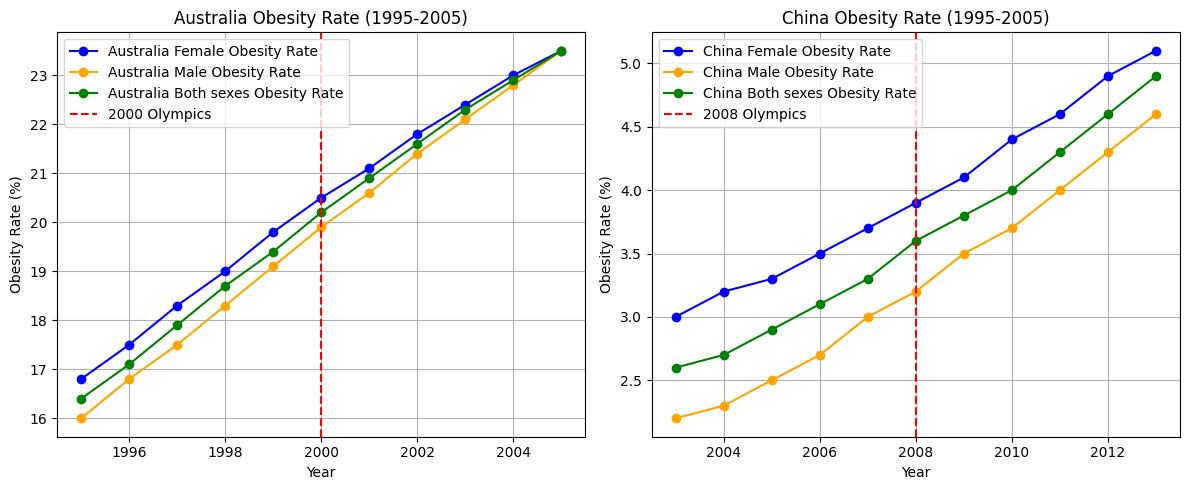

In [88]:
two_plot_health(
    gender_column='Gender',
    metric='Obesity Rate',
    df1=cleaned_df1_obe,
    host_year1=2000,
    title1="Australia Obesity Rate (1995-2005)",
    df2=cleaned_df2_obe,
    host_year2=2008,
    title2="China Obesity Rate (1995-2005)",
    x_column='Year',
    y_column='Rate',
    xlabel="Year",
    ylabel="Obesity Rate (%)",
)

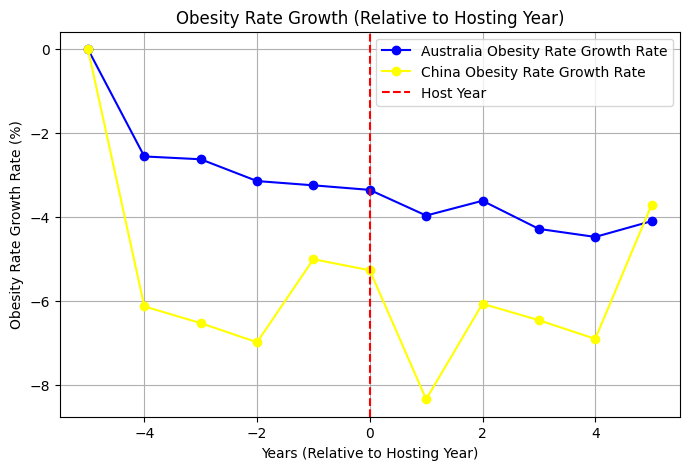

In [89]:
growth_rate_plot(
    dfs=[
        cleaned_df1_obe[cleaned_df1_obe['Gender'] == 'Both sexes'], 
        cleaned_df2_obe[cleaned_df2_obe['Gender'] == 'Both sexes']
    ], 
    countries=['Australia', 'China'], 
    metric='Obesity Rate',
    colors=None
)

* Under Weight

In [51]:
AUS_underweight = preprocess_csv_type2(
        file_path='data/Prevalence_of_underweight_among_adults.csv',
        country_column='Location',
        countries=['Australia'],
        year_column='Period',
        year_range=(1995, 2005),
        skip_rows=0
    )
    

CHI_underweight = preprocess_csv_type2(
        file_path='data/Prevalence_of_obesity_among_adults.csv',
        country_column='Location',
        countries=['China'],
        year_column='Period',
        year_range=(2003, 2013),
        skip_rows=0
    )
print(AUS_underweight.head())  # test success
print(CHI_underweight.head())  # test success

      Location  Period        Dim1  Value
102  Australia    2005        Male    0.9
103  Australia    2005  Both sexes    1.5
104  Australia    2005      Female    2.0
108  Australia    2004        Male    0.9
109  Australia    2004  Both sexes    1.5
   Location  Period        Dim1  Value
57    China    2013        Male    4.6
58    China    2013  Both sexes    4.9
59    China    2013      Female    5.1
63    China    2012        Male    4.3
64    China    2012  Both sexes    4.6


In [52]:
cleaned_df1_underweight = process_heath_data(AUS_underweight, host_year=2000, metric_name='Underweight')
cleaned_df2_underweight = process_heath_data(CHI_underweight, host_year=2008, metric_name='Underweight')

print("Australia Data:")
print(cleaned_df1_underweight.head())
print("\nChina Data:")
print(cleaned_df2_underweight.head())

Australia Data:
   index    Country  Year  Gender  Underweight_rate  Growth Rate (%)  \
0    165  Australia  1995  Female               2.7         0.000000   
1    158  Australia  1996  Female               2.6         5.000000   
2    152  Australia  1997  Female               2.5         0.000000   
3    146  Australia  1998  Female               2.4         0.000000   
4    140  Australia  1999  Female               2.3         4.761905   

   Relative Year  
0             -5  
1             -4  
2             -3  
3             -2  
4             -1  

China Data:
   index Country  Year  Gender  Underweight_rate  Growth Rate (%)  \
0    119   China  2003  Female               3.0         0.000000   
1    113   China  2004  Female               3.2        -3.921569   
2    107   China  2005  Female               3.3        -6.122449   
3    101   China  2006  Female               3.5        -4.347826   
4     95   China  2007  Female               3.7        -6.818182   

   Relati

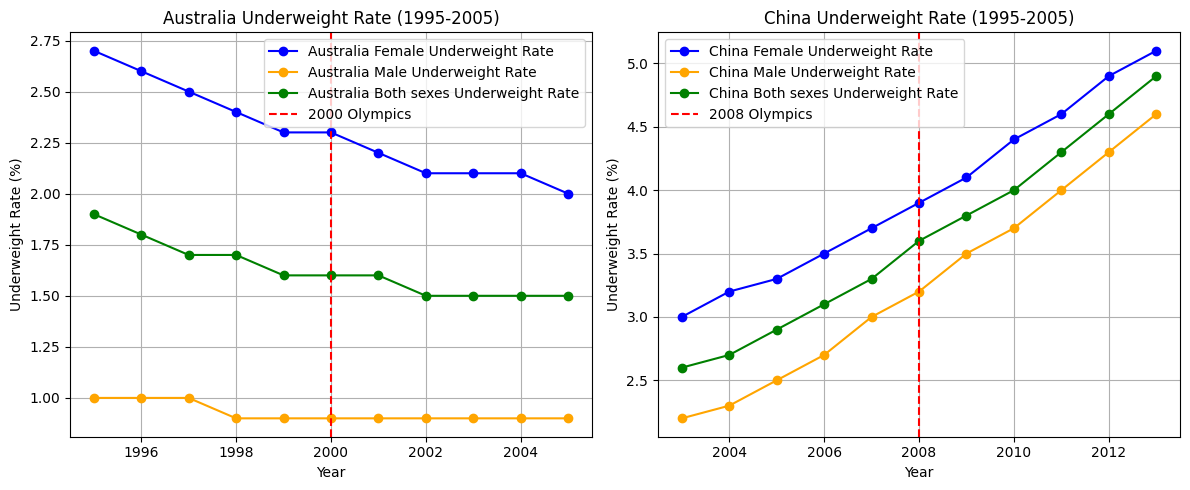

In [92]:
two_plot_health(
    gender_column='Gender',
    metric='Underweight Rate',
    df1=cleaned_df1_underweight,
    host_year1=2000,
    title1="Australia Underweight Rate (1995-2005)",
    df2=cleaned_df2_underweight,
    host_year2=2008,
    title2="China Underweight Rate (1995-2005)",
    x_column='Year',
    y_column='Rate',
    xlabel="Year",
    ylabel="Underweight Rate (%)",
)

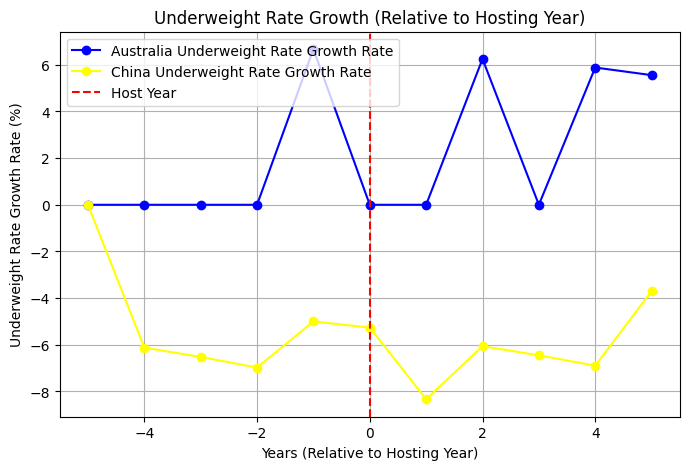

In [93]:
growth_rate_plot(
    dfs=[
        cleaned_df1_underweight[cleaned_df1_underweight['Gender'] == 'Both sexes'], 
        cleaned_df2_underweight[cleaned_df2_underweight['Gender'] == 'Both sexes']
    ], 
    countries=['Australia', 'China'], 
    metric='Underweight Rate',
    colors=None
)

## Environment Indicators

* Greenhouse Gas Emission

In [173]:
AUS_GHG_emission = preprocess_csv_type3(
        file_path='data/ghg-emissions.csv',
        country_column='Country/Region',
        countries=['Australia'],
        year_column='Year',
        year_range=(1995,2005)
    )


CHI_GHG_emission = preprocess_csv_type3(
        file_path='data/ghg-emissions.csv',
        country_column='Country/Region',
        countries=['China'],
        year_column='Year',
        year_range=(2003,2013)
    )
print(AUS_GHG_emission.head()) 
print(CHI_GHG_emission.head()) 

  Country/Region  Year   Value
5      Australia  1995  571.19
6      Australia  1996  571.01
7      Australia  1997  582.28
8      Australia  1998  608.08
9      Australia  1999   643.6
   Country/Region  Year    Value
13          China  2003  5386.89
14          China  2004  6135.95
15          China  2005  6862.81
16          China  2006  7547.54
17          China  2007  8165.43


In [174]:
cleaned_df1_GHG = index_rename_and_calculate_growth_rate(
    df=AUS_GHG_emission,
    rename_dict={'Value':'MtCO2e'},
    host_year=2000,
    metric_column='MtCO2e')

cleaned_df2_GHG = index_rename_and_calculate_growth_rate(
    df=CHI_GHG_emission,
    rename_dict={'Value':'MtCO2e'},
    host_year=2008,
    metric_column='MtCO2e')

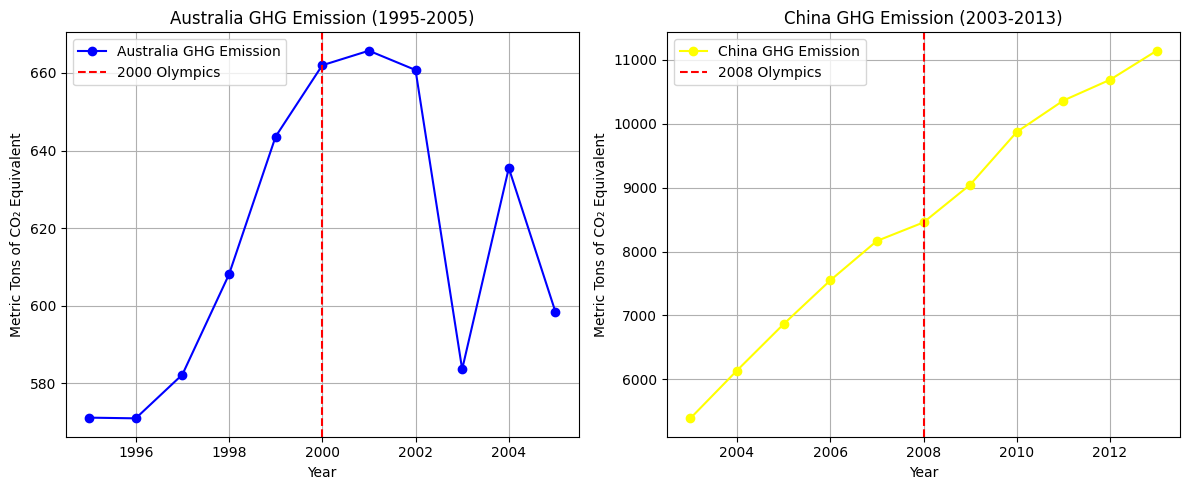

In [175]:
two_subplots(
    df1=cleaned_df1_GHG,
    host_year1=2000,
    legend1="Australia GHG Emission",
    title1="Australia GHG Emission (1995-2005)",
    df2=cleaned_df2_GHG,
    host_year2=2008,
    legend2="China GHG Emission",
    title2="China GHG Emission (2003-2013)",
    x_column='Year',
    y_column='MtCO2e',
    xlabel="Year",
    ylabel="Metric Tons of CO₂ Equivalent",
)

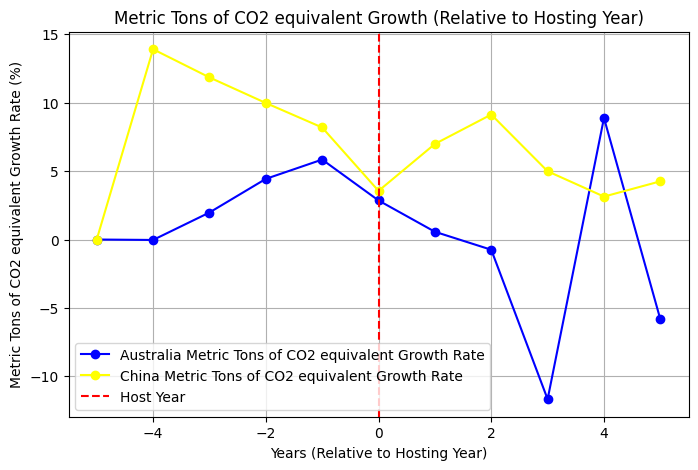

In [176]:
growth_rate_plot(
    dfs=[cleaned_df1_GHG,cleaned_df2_GHG], 
    countries=['Australia', 'China'], 
    metric='Metric Tons of CO2 equivalent',
    colors=None
)

## Labor Market

In [34]:
AUS_UR = preprocess_csv_type3(
        file_path='data/Unemployment_rate_Australia.csv.csv',
        country_column='Country Name',
        countries=['Australia'],
        year_column='Year',
        year_range=(1995, 2005),
        skip_rows=4
    )


CHI_UR = preprocess_special_csv(
        file_path='data/Unemployment_rate_China.csv',
        year_column='Year',
        year_range=(2003, 2013),
        skip_rows=2
    )

print(AUS_UR.head())
print(CHI_UR.head())

   Country Name  Year  Value
35    Australia  1995  8.473
36    Australia  1996  8.509
37    Australia  1997  8.367
38    Australia  1998  7.684
39    Australia  1999  6.876
                             Indicator  Year  Value
4   Unemployment Rate in Urban Area(%)  2003    4.1
7   Unemployment Rate in Urban Area(%)  2004    4.1
10  Unemployment Rate in Urban Area(%)  2005    4.1
13  Unemployment Rate in Urban Area(%)  2006    4.1
16  Unemployment Rate in Urban Area(%)  2007    4.1


In [35]:
cleaned_df1_UR = index_rename_and_calculate_growth_rate(
    df=AUS_UR,
    rename_dict={'Value':'Unemployment_Rate(%)'},
    host_year=2000,
    metric_column='Unemployment_Rate(%)')

cleaned_df2_UR = index_rename_and_calculate_growth_rate(
    df=CHI_UR,
    rename_dict={'Value':'Unemployment_Rate(%)'},
    host_year=2008,
    metric_column='Unemployment_Rate(%)')

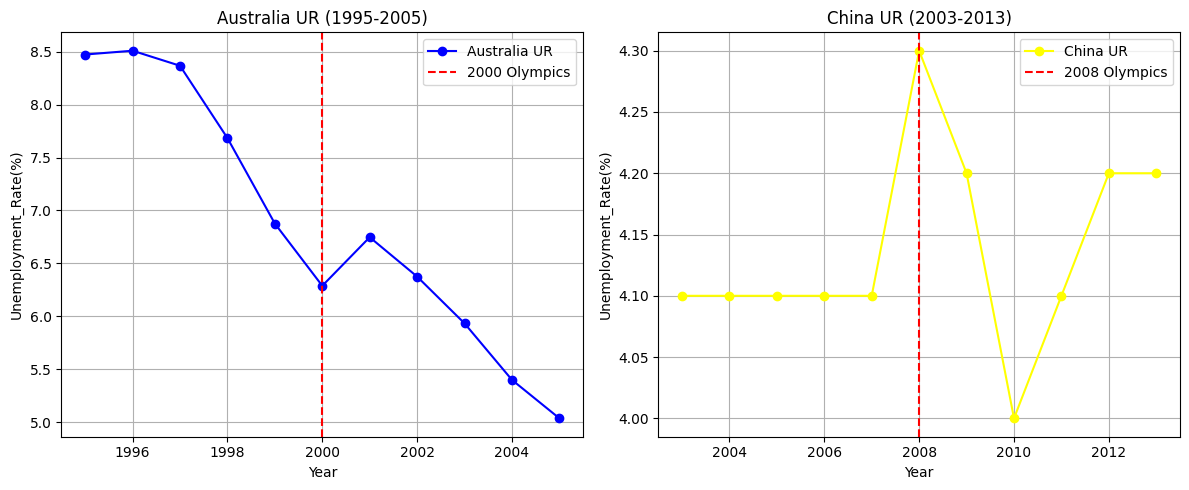

In [6]:
two_subplots(
    df1=cleaned_df1_UR,
    host_year1=2000,
    legend1="Australia UR",
    title1="Australia UR (1995-2005)",
    df2=cleaned_df2_UR,
    host_year2=2008,
    legend2="China UR",
    title2="China UR (2003-2013)",
    x_column='Year',
    y_column='Unemployment_Rate(%)',
    xlabel="Year",
    ylabel="Unemployment_Rate(%)",
)

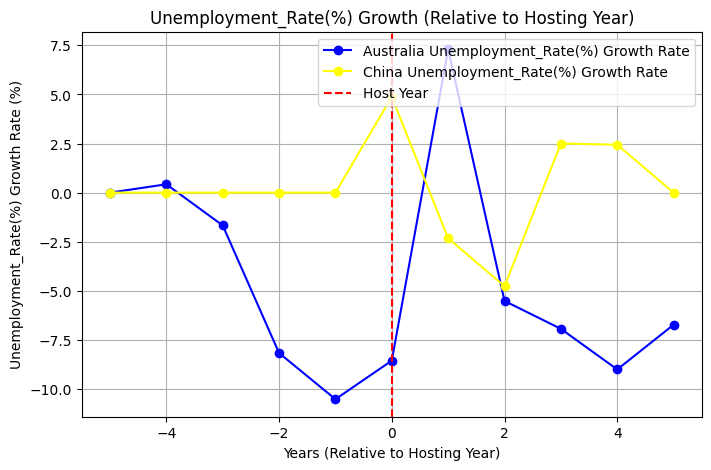

In [7]:
growth_rate_plot(
    dfs=[cleaned_df1_UR,cleaned_df2_UR], 
    countries=['Australia', 'China'], 
    metric='Unemployment_Rate(%)',
    colors=None
)

## Metrics like GDP, FDI, and unemployment often influence each other. Therefore, we further explore correlations between metrics for each country before and after the Olympics. We also include specific combinations of metrics and allow users to select. Visualization is done using scatterplots or heatmaps.

1. Within Group Analysis

merge 8*2=16 csv into 1 dataframe for analysis

In [178]:
metrics = {
    "GDP_per_capita": {"AUS": cleaned_df1_gdp, "CHI": cleaned_df2_gdp},
    "FDI": {"AUS": cleaned_df1_FDI, "CHI": cleaned_df2_FDI},
    "Gov_Consumption": {"AUS": cleaned_df1_gov_consume, "CHI": cleaned_df2_gov_consume},
    "Num_Arrivals": {"AUS": cleaned_df1_tour, "CHI": cleaned_df2_tour},
    "Obesity_rate": {"AUS": cleaned_df1_obe[cleaned_df1_obe['Gender'] == 'Both sexes'], 
                     "CHI": cleaned_df2_obe[cleaned_df2_obe['Gender'] == 'Both sexes']},
    "Underweight_rate": {"AUS": cleaned_df1_underweight[cleaned_df1_underweight['Gender'] == 'Both sexes'], 
                         "CHI": cleaned_df2_underweight[cleaned_df2_underweight['Gender'] == 'Both sexes']},
    "MtCO2e": {"AUS": cleaned_df1_GHG, "CHI": cleaned_df2_GHG},
    "Unemployment_Rate(%)": {"AUS": cleaned_df1_UR, "CHI": cleaned_df2_UR}
}


merged_data = load_and_merge_data(metrics)
print(merged_data.head())

   Relative Year  GDP_per_capita_AUS  GDP_per_capita_CHI    FDI_AUS  \
0             -5          20448.1220           1288.6375  13.268875   
1             -4          22021.7839           1508.6679   4.563952   
2             -3          23646.6230           1753.4142   8.088069   
3             -2          21479.1142           2099.2194   7.597611   
4             -1          20712.6698           2693.9587   2.210918   

      FDI_CHI  Gov_Consumption_AUS  Gov_Consumption_CHI  Num_Arrivals_AUS  \
0   57.900937            68.630829           254.258838             3.726   
1   68.117272            74.587956           285.976158             4.165   
2  104.108694            79.594491           338.268817             4.318   
3  124.082036            72.989894           407.878185             4.167   
4  156.249335            72.984710           519.297995             4.459   

   Num_Arrivals_CHI  Obesity_rate_AUS  Obesity_rate_CHI  Underweight_rate_AUS  \
0            91.662          

Split 8 metrics into 3 groups: economic, social, employment

Numerical Analysis: compute correlation matrix for every group and every country

In [179]:
correlation_matrices = compute_country_correlation_matrices(merged_data, metric_groups, country_suffix)

# Access Australia's and China's correlations
aus_corr = correlation_matrices["Australia"]
chi_corr = correlation_matrices["China"]



Computing correlation matrices for Australia:

Economic Correlation Matrix for Australia:
                     GDP_per_capita_AUS   FDI_AUS  Gov_Consumption_AUS
GDP_per_capita_AUS             1.000000 -0.194408             0.993077
FDI_AUS                       -0.194408  1.000000            -0.193891
Gov_Consumption_AUS            0.993077 -0.193891             1.000000

Social Correlation Matrix for Australia:
                          Num_Arrivals_AUS  Obesity_rate_AUS  \
Num_Arrivals_AUS                  1.000000          0.936591   
Obesity_rate_AUS                  0.936591          1.000000   
Underweight_rate_AUS             -0.889052         -0.947868   
Unemployment_Rate(%)_AUS         -0.931200         -0.971785   

                          Underweight_rate_AUS  Unemployment_Rate(%)_AUS  
Num_Arrivals_AUS                     -0.889052                 -0.931200  
Obesity_rate_AUS                     -0.947868                 -0.971785  
Underweight_rate_AUS                 

Numerical Analysis: What are the max & min correlation values within every matrix? Does it differ across countries?

In [180]:
# Step 1: Organize correlation matrices dynamically
country_matrices = {}

for country, suffix in country_suffix.items():
    country_matrices[country] = {}
    for group, metrics in metric_groups.items():
        group_columns = [f"{metric}{suffix}" for metric in metrics if f"{metric}{suffix}" in merged_data.columns]
        if len(group_columns) > 1:
            group_corr = calculate_correlation(merged_data, group_columns, time_period=(-5, 5))
            country_matrices[country][group] = group_corr

# Step 2: Highlight key correlations dynamically for all countries and groups
for country, matrices in country_matrices.items():
    highlight_key_correlations_all_matrices(matrices, country)



=== Highlighting Key Correlations for Australia ===

Economic Correlation Matrix:
  Strongest correlation: ('GDP_per_capita_AUS', 'Gov_Consumption_AUS') = 0.99
  Weakest correlation: ('GDP_per_capita_AUS', 'FDI_AUS') = -0.19

Social Correlation Matrix:
  Strongest correlation: ('Num_Arrivals_AUS', 'Obesity_rate_AUS') = 0.94
  Weakest correlation: ('Obesity_rate_AUS', 'Unemployment_Rate(%)_AUS') = -0.97

=== Highlighting Key Correlations for China ===

Economic Correlation Matrix:
  Strongest correlation: ('GDP_per_capita_CHI', 'Gov_Consumption_CHI') = 1.00
  Weakest correlation: ('FDI_CHI', 'Gov_Consumption_CHI') = 0.93

Social Correlation Matrix:
  Strongest correlation: ('Obesity_rate_CHI', 'Underweight_rate_CHI') = 1.00
  Weakest correlation: ('Num_Arrivals_CHI', 'Unemployment_Rate(%)_CHI') = 0.17


For economic correlation, both Australia and China see the strongest correlation between GDP and Gov. consumption. However, the weakest correlation differs between them. GDP and FDI is most weakly correlated for Australia, while FDI and Gov. consumption is most weakly correlated for China. 

As to social correlations, Australia finds the strongest relationship between tourism and Obesity rate, and weakest relationship between Obesity rate and Unemployment rate. However, China finds the strongest relationship between Obesity rate and Underweight rate, and the weakest relationship between tourism and unemployment rate.

Visualization Analysis: create a heatmap to capture correlation strength within every group for both countries

Generating heatmaps for Australia:


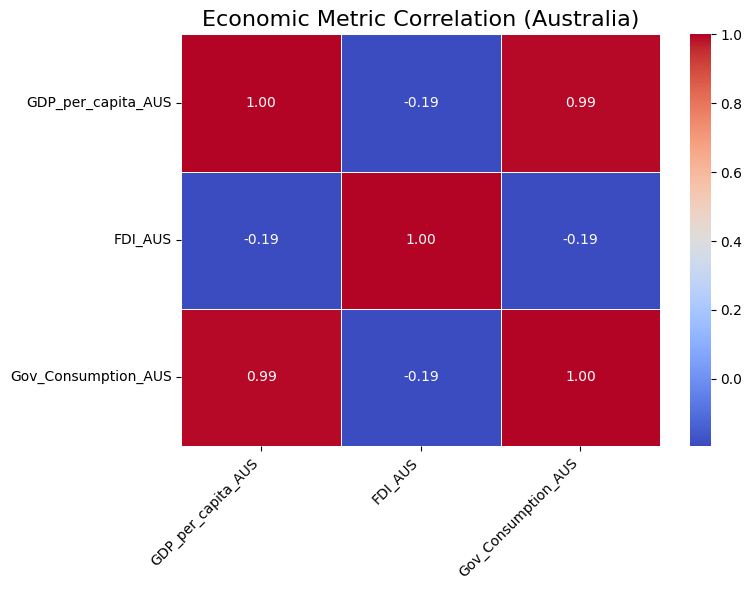

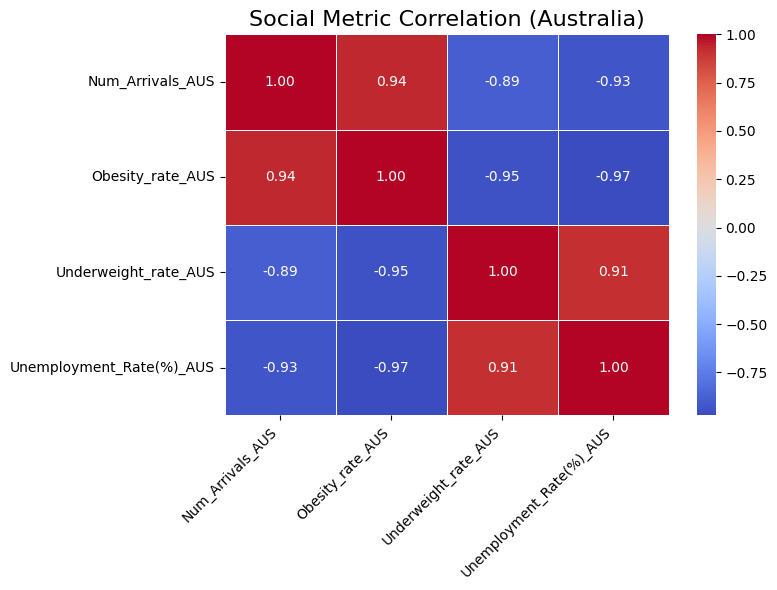

Generating heatmaps for China:


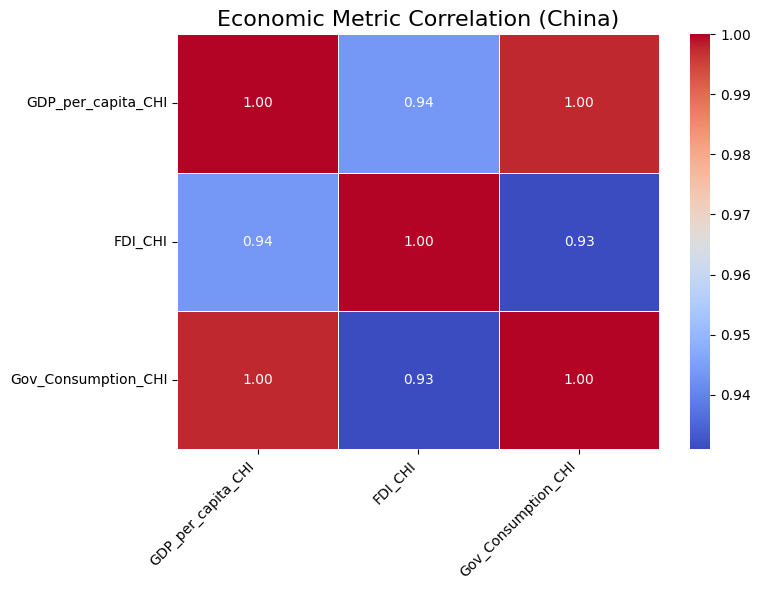

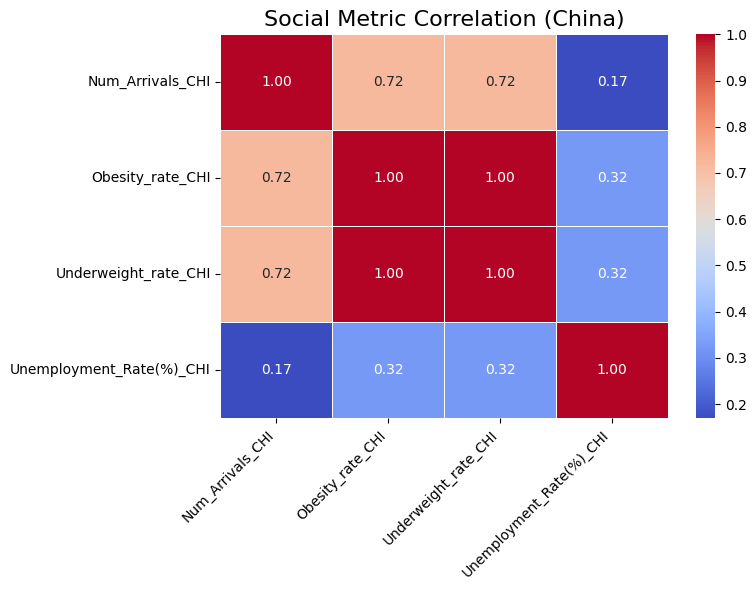

In [128]:
plot_all_heatmaps(correlation_matrices, metric_groups)

2. Cross group Correlation

Select from a range of important metric combinations, and see how they correlated to each other in scattorplot


Available Metric Combinations:
1: Do GDP and FDI correlated?
2: How does fiscal policy impact government consumption?
3: Does tourism impact economic growth?
4: Health trade-offs
5: Environmental cost of economic growth
6: Does increasing tourism lead to higher GHG emission?
7: Economic growth's effect on employment

Selected combination: Does increasing tourism lead to higher GHG emission?

Selected country suffix: AUS
Checking columns: Num_Arrivals_AUS and MtCO2e_AUS

Correlation between Num_Arrivals and MtCO2e in AUS: 0.50


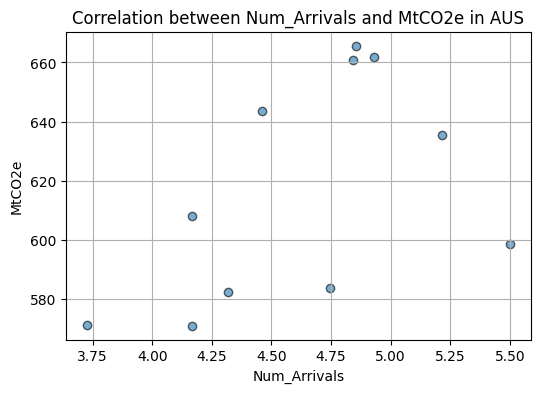

In [181]:
predefined_correlation_analysis(merged_data)

Use bar plots to compare the correlation strength of specific metric pairs (e.g., GDP vs FDI) between Australia and China.

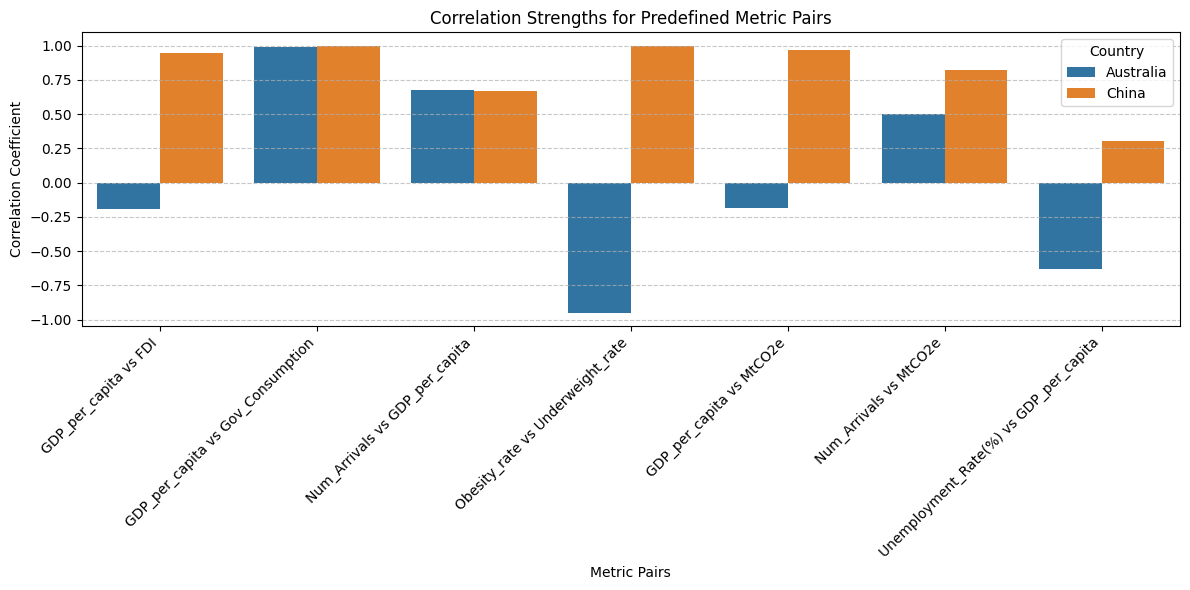

In [182]:
# Assuming predefined_combinations and merged_data are already defined
plot_predefined_combinations_bar(predefined_combinations, merged_data)

This analysis focuses on the period surrounding the Olympic Games in Australia (1995-2005) and China (2003-2013) to examine the potential impacts of hosting the Olympics on various socioeconomic and environmental metrics. The high positive correlation between "GDP per capita" and "Government Consumption" in both countries suggests that government spending on infrastructure and services during this period may have contributed significantly to economic growth, potentially reflecting the large-scale investments required for hosting the Olympics. The strong correlation between "Num Arrivals" and "GDP per capita" in China, compared to its absence in Australia, might indicate that China's economic growth during this period was more closely tied to tourism, possibly due to increased international attention as the Olympics approached. The contrasting correlations for "Obesity rate vs Underweight rate" reveal divergent public health challenges: Australia's negative correlation suggests distinct regional health outcomes, while China's positive correlation points to overlapping nutritional disparities that may be intensified by uneven development. Additionally, the weaker correlation between "GDP per capita" and "MtCO2e" in Australia, compared to China, could reflect differences in how economic growth and industrialization were managed, with China's rapid urbanization and industrial expansion likely contributing more significantly to emissions.